# Chapter 12: Hands on CNN for Classification

***

Epoch 1/10
375/375 [==============================] - 14s 36ms/step - loss: 0.2558 - accuracy: 0.9269 - val_loss: 0.0751 - val_accuracy: 0.9777
Epoch 2/10
375/375 [==============================] - 14s 37ms/step - loss: 0.0633 - accuracy: 0.9806 - val_loss: 0.0576 - val_accuracy: 0.9837
Epoch 3/10
375/375 [==============================] - 14s 37ms/step - loss: 0.0434 - accuracy: 0.9863 - val_loss: 0.0460 - val_accuracy: 0.9860
Epoch 4/10
375/375 [==============================] - 13s 36ms/step - loss: 0.0325 - accuracy: 0.9902 - val_loss: 0.0468 - val_accuracy: 0.9853
Epoch 5/10
375/375 [==============================] - 14s 37ms/step - loss: 0.0278 - accuracy: 0.9908 - val_loss: 0.0404 - val_accuracy: 0.9881
Epoch 6/10
375/375 [==============================] - 13s 36ms/step - loss: 0.0206 - accuracy: 0.9929 - val_loss: 0.0400 - val_accuracy: 0.9880
Epoch 7/10
375/375 [==============================] - 13s 35ms/step - loss: 0.0174 - accuracy: 0.9942 - val_loss: 0.0411 - val_accuracy:

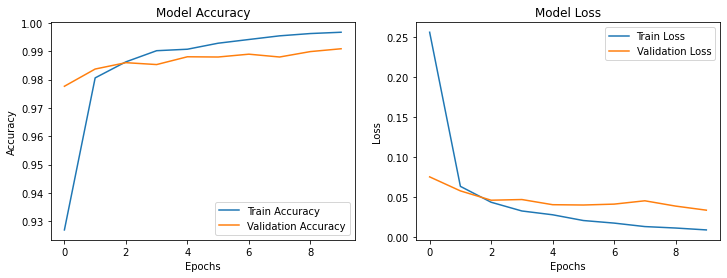

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the dataset to add a channel dimension and normalize pixel values
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 classes for digits 0-9

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=128, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}')

# Plotting training and validation accuracy and loss
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch 1/5
750/750 [==============================] - 14s 18ms/step - loss: 0.2130 - accuracy: 0.9353 - val_loss: 0.0834 - val_accuracy: 0.9742
Epoch 2/5
750/750 [==============================] - 14s 19ms/step - loss: 0.0587 - accuracy: 0.9816 - val_loss: 0.0524 - val_accuracy: 0.9859
Epoch 3/5
750/750 [==============================] - 14s 19ms/step - loss: 0.0414 - accuracy: 0.9870 - val_loss: 0.0642 - val_accuracy: 0.9803
Epoch 4/5
750/750 [==============================] - 15s 19ms/step - loss: 0.0316 - accuracy: 0.9902 - val_loss: 0.0385 - val_accuracy: 0.9892
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0267 - accuracy: 0.9916
Test Accuracy: 0.9916


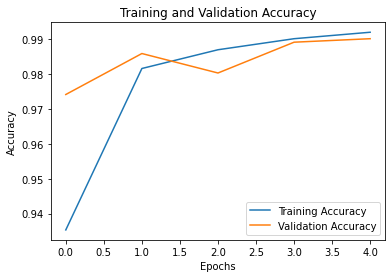

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Step 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 2: Preprocess the data
# Reshape to (28, 28, 1) and normalize the pixel values (0 to 1)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 3: Build the CNN model
model = models.Sequential()

# First Convolutional layer with 32 filters and (3x3) kernel
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# MaxPooling layer to reduce dimensionality
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional layer with 64 filters and (3x3) kernel
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Another MaxPooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional layer with 64 filters
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the 3D output to 1D for the Dense layers
model.add(layers.Flatten())

# Fully connected Dense layer with 64 units
model.add(layers.Dense(64, activation='relu'))

# Output layer for 10 classes (digits 0-9)
model.add(layers.Dense(10, activation='softmax'))

# Step 4: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Step 7: Plot training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
model.save('model.h5')

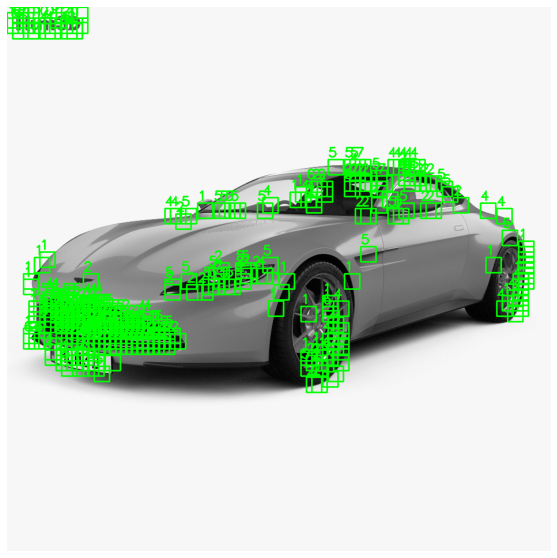

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Step 1: Load a large image for digit detection (assuming it's grayscale)
image_path = './images/db10_2.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Normalize the image pixel values
image = image / 255.0

# Step 2: Sliding window parameters
window_size = 28  # Size of the window (28x28)
step_size = 10    # How much the window moves between each step

# Dimensions of the large image
image_height, image_width = image.shape

# For storing detected digits and their locations
detected_digits = []
positions = []

# Step 3: Sliding window over the image
for y in range(0, image_height - window_size + 1, step_size):
    for x in range(0, image_width - window_size + 1, step_size):
        # Extract the window (28x28 patch)
        window = image[y:y + window_size, x:x + window_size]
        
        # Step 4: Resize and reshape the window for the CNN model
        window_reshaped = window.reshape(1, 28, 28, 1)  # (1, 28, 28, 1) for CNN
        
        # Step 5: Classify the window using the CNN model
        prediction = model.predict(window_reshaped)
        predicted_label = np.argmax(prediction, axis=1)[0]  # Get the predicted digit
        
        # If confidence of prediction is high, store the result (you can define a threshold)
        if np.max(prediction) > 0.7:  # Set a confidence threshold
            detected_digits.append(predicted_label)
            positions.append((x, y))

# Step 6: Visualize the result
# Convert image back to RGB for visualization
output_image = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_GRAY2BGR)

# Draw rectangles and labels for each detected digit
for i, (x, y) in enumerate(positions):
    cv2.rectangle(output_image, (x, y), (x + window_size, y + window_size), (0, 255, 0), 2)
    cv2.putText(output_image, str(detected_digits[i]), (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# Step 7: Display the image with detected digits
plt.figure(figsize=(10, 10))
plt.imshow(output_image)
plt.axis('off')
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load pre-trained digit detection model (e.g., from MNIST)
digit_model = load_model('model.h5')  # Load previously trained digit detection model

# Function to apply sliding window
def sliding_window(image, step_size, window_size):
    """Slide a window across the image."""
    for y in range(0, image.shape[0] - window_size[1], step_size):
        for x in range(0, image.shape[1] - window_size[0], step_size):
            yield (x, y, image[y:y + window_size[1], x:x + window_size[0]])

# Function to detect digits in license plates
def detect_digits_in_license_plate(plate_image, model, window_size=(28, 28), step_size=10):
    plate_image_gray = cv2.cvtColor(plate_image, cv2.COLOR_BGR2GRAY)
    detected_digits = []

    for (x, y, window) in sliding_window(plate_image_gray, step_size, window_size):
        if window.shape[0] != window_size[1] or window.shape[1] != window_size[0]:
            continue

        window_resized = cv2.resize(window, (28, 28))
        window_resized = window_resized.reshape(1, 28, 28, 1) / 255.0  # Normalize

        prediction = model.predict(window_resized)
        predicted_digit = np.argmax(prediction)

        if np.max(prediction) > 0.9:  # Only consider confident predictions
            detected_digits.append((x, y, window_size[0], window_size[1], predicted_digit))

    return detected_digits

# Load a license plate image (make sure it's in the right format)
license_plate_img = cv2.imread('car_plate.png')  # Replace with your license plate image path

# Detect digits
detected_boxes = detect_digits_in_license_plate(license_plate_img, digit_model)

# Draw bounding boxes and digits on the image
for (x, y, w, h, digit) in detected_boxes:
    cv2.rectangle(license_plate_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(license_plate_img, str(digit), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Show the resulting image with bounding boxes and detected digits
plt.imshow(cv2.cvtColor(license_plate_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()